In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

income = pd.read_excel('../data/raw/income.xlsx')

income = income.iloc[585:1047,[0,1,22,23,24,25,26]]

income.columns = ['SA2_code','SA2_name','2014','2015','2016','2017','2018']

income

,SA2_code,SA2_name,2014,2015,2016,2017,2018
585,201011001,Alfredton,56374,57747,60026,62315,63668
586,201011002,Ballarat,67217,72754,71895,74671,77876
587,201011003,Ballarat - North,53017,54660,56067,59786,60367
588,201011004,Ballarat - South,45473,46143,47676,49041,50778
589,201011005,Buninyong,58011,58292,60009,61565,63258
...,...,...,...,...,...,...,...
1042,217031476,Otway,40640,42426,44236,44755,46448
1043,217041477,Moyne - East,48627,47031,49104,50652,55573
1044,217041478,Moyne - West,48280,50307,51459,52080,55547
1045,217041479,Warrnambool - North,50513,50939,52090,59812,56099


In [40]:
postcode_SA2 = pd.read_csv('../data/raw/postcode_SA2.csv')

postcode_SA2 = postcode_SA2[['POSTCODE', 'SA2_MAINCODE_2011', 'SA2_NAME_2011']]

postcode_SA2 = postcode_SA2.rename(columns={'POSTCODE' : 'Postcode', 'SA2_MAINCODE_2011' : 'SA2_code', 'SA2_NAME_2011' : 'SA2_name'})

postcode_SA2 = postcode_SA2.iloc[1763:3207]

income_postcode = pd.merge(postcode_SA2, income, how='left', on='SA2_name')

income_postcode = income_postcode[['Postcode', '2014', '2015', '2016', '2017', '2018']]

income_postcode = income_postcode.fillna(50000)

income_postcode = income_postcode.groupby('Postcode').mean()

income_postcode

,2016,2017,2018
Postcode,,,
3000,72180.4,73736.000000,76708.000000
3002,124057.0,128069.000000,132130.000000
3003,62117.0,65142.000000,66723.000000
3004,100123.5,104243.166667,105672.833333
3005,68978.0,69260.000000,71476.000000
...,...,...,...
3990,45522.0,47392.000000,49340.000000
3991,45522.0,47392.000000,49340.000000
3992,45522.0,47392.000000,49340.000000


In [41]:
area = income_postcode.shape[0]

In [42]:
k=4
coef=pd.DataFrame(np.zeros(area*(k+1)).reshape(area,k+1))
error=[]
for i in range(0,area):
    x=np.arange(1,len(income_postcode.columns))
    y=income_postcode.iloc[i,1:]
    model=np.polyfit(x,y,k)
    fit=np.poly1d(model)
    fit_value=fit(x)
    coef.iloc[i,:]=pd.DataFrame(fit).T
    error.append(abs(fit_value-y).mean())
coef['error']=error
coef

/opt/anaconda3/envs/ads/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/anaconda3/envs/ads/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/anaconda3/envs/ads/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/anaconda3/envs/ads/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/anaconda3/envs/ads/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/anaconda3/envs/ads/lib/python3.8/site-package

,0,1,2,3,4,error
0,-992.480079,-913.769458,2261.245174,17471.851864,55909.152499,1.455192e-11
1,-1754.734890,-1640.991436,3852.162849,30312.474860,97300.088618,0.000000e+00
2,-906.160001,-858.413826,1926.247769,15403.553489,49576.772569,1.455192e-11
3,-1480.998016,-1427.545202,3007.211050,24615.820168,79528.678667,1.455192e-11
4,-948.408074,-886.482286,2084.612624,16393.659239,52616.618497,3.637979e-11
...,...,...,...,...,...,...
691,-636.829378,-585.451133,1455.946450,11230.759257,35927.574804,3.637979e-12
692,-636.829378,-585.451133,1455.946450,11230.759257,35927.574804,3.637979e-12
693,-636.829378,-585.451133,1455.946450,11230.759257,35927.574804,3.637979e-12
694,-636.829378,-585.451133,1455.946450,11230.759257,35927.574804,3.637979e-12


In [43]:
#进行预测
pred_x=(len(income_postcode.columns),len(income_postcode.columns)+1,len(income_postcode.columns)+2,len(income_postcode.columns)+3)
pred=[]
for i in range(0,area):
    x=np.arange(1,len(income_postcode.columns))
    y=income_postcode.iloc[i,1:]
    model=np.polyfit(x,y,k)
    fit=np.poly1d(model)
    fit_value=fit(x)
    pred.append(fit(pred_x))
pred=pd.DataFrame(pred)
pred

/opt/anaconda3/envs/ads/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/anaconda3/envs/ads/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/anaconda3/envs/ads/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/anaconda3/envs/ads/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/anaconda3/envs/ads/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/anaconda3/envs/ads/lib/python3.8/site-package

,0,1,2,3
0,23613.252920,-150579.662705,-534721.690230,-1.241483e+06
1,36466.683951,-274050.990182,-956666.701802,-2.210738e+06
2,16547.529582,-144904.494262,-498900.994560,-1.148458e+06
3,21936.478884,-244391.048845,-826278.854396,-1.892240e+06
4,19803.034123,-147982.275778,-516865.101622,-1.194592e+06
...,...,...,...,...
691,15333.010387,-96351.438336,-342719.720745,-7.960621e+05
692,15333.010387,-96351.438336,-342719.720745,-7.960621e+05
693,15333.010387,-96351.438336,-342719.720745,-7.960621e+05
694,15333.010387,-96351.438336,-342719.720745,-7.960621e+05


/opt/anaconda3/envs/ads/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


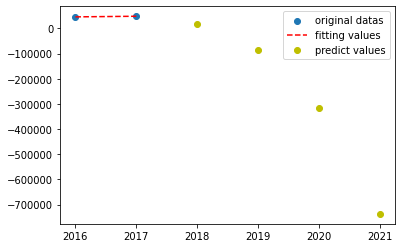

In [44]:
#画某个地区的拟合图
x=np.arange(1,len(income_postcode.columns))
y=income_postcode.iloc[i,1:]
model=np.polyfit(x,y,k)
fit=np.poly1d(model)
fit_value=fit(x)
pred=fit(pred_x)
plt.scatter(range(2016,2018),y,marker='o',label='original datas')#对原始数据画散点图
plt.plot(range(2016,2018),fit_value,ls='--',c='red',label='fitting values')#对拟合之后的数据画图
plt.plot(range(2018,2022),pred,'o',c='y',label='predict values')#对预测数据画图
plt.legend()